<a href="https://colab.research.google.com/github/jyotidabass/Cascade_face-detector/blob/main/Cascade_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JeeveshN/Face-Detect

Cloning into 'Face-Detect'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 53 (delta 7), reused 6 (delta 2), pack-reused 38
Unpacking objects: 100% (53/53), done.


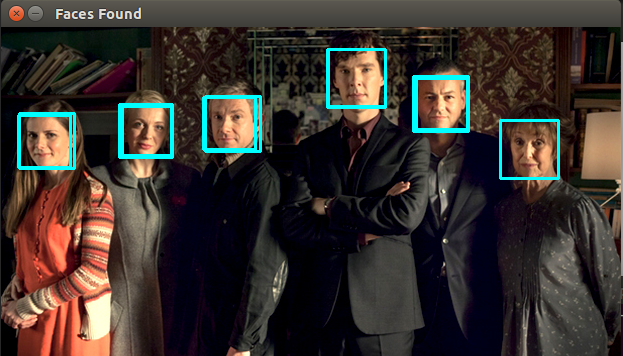

In [16]:
from random import randint
from google.colab.patches import cv2_imshow
import cv2
import sys
import os
import traceback
      
CASCADE="/content/Face-Detect/Face_cascade.xml"
FACE_CASCADE=cv2.CascadeClassifier(CASCADE)

def detect_faces(image_path,display=True):

	image=cv2.imread('/content/Face-Detect/extras/1.png')
	image_grey=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

	faces = FACE_CASCADE.detectMultiScale(image_grey,scaleFactor=1.16,minNeighbors=5,minSize=(25,25),flags=0)

	for x,y,w,h in faces:
	    sub_img=image[y-10:y+h+10,x-10:x+w+10]
	    os.chdir("Extracted")
	    cv2.imwrite(str(randint(0,10000))+".jpg",sub_img)
	    os.chdir("../")
	    cv2.rectangle(image,(x,y),(x+w,y+h),(255, 255,0),2)

	if display:
		cv2_imshow(image)
		# if (cv2.waitKey(0) & 0xFF == ord('q')) or (cv2.waitKey(0) & 0xFF == ord('Q')):
		# 	cv2.destroyAllWindows()

if __name__ == "__main__":
	
	if not "Extracted" in os.listdir("."):
		os.mkdir("Extracted")
    
	if len(sys.argv) < 2:
		print("Usage: python Detect_face.py 'image path'")
		sys.exit()

	if os.path.isdir(sys.argv[1]):
		for image in os.listdir(sys.argv[1]):
			try:
				print ("Processing.....",os.path.abspath(os.path.join(sys.argv[1],image)))
				detect_faces(os.path.abspath(os.path.join(sys.argv[1],image)),False)
			except Exception:
				print ("Could not process ",os.path.abspath(os.path.join(sys.argv[1],image)))
	else:
		detect_faces(sys.argv[1])